# Clustering Analysis on the Wholesale Customers Dataset

This notebook performs an in-depth clustering analysis using:

- **K-Means**
- **Agglomerative Clustering**
- **DBSCAN**
- **OPTICS**

It also evaluates models using:

- **Silhouette Score**
- **Davies-Bouldin Index**

Finally, PCA visualization is applied to compare cluster structures across methods.

In [13]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os 
save_path = "../images"
os.makedirs(save_path, exist_ok=True)

data = pd.read_csv("../data/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Data Preprocessing

We remove the non-numerical columns "Channel" and "Region" and scale all features using **StandardScaler**, which is essential for clustering algorithms.

In [14]:
X = data.drop(['Channel', 'Region'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means: Finding Optimal K (Elbow Method)

We compute inertia values for `k = 1 to 10` to determine the optimal number of clusters.

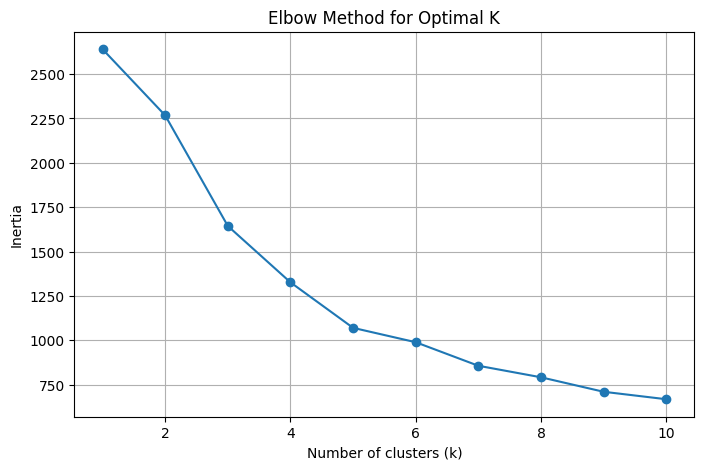

In [15]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.savefig(f"{save_path}/Inertia.png", dpi=300)
plt.show()

## K-Means Clustering

Using **k = 3**, we fit the model and examine cluster centers.

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
clusters = kmeans.fit_predict(X_scaled)
data['Cluster_KMeans'] = clusters

print("Cluster centers:\n")
kmeans.cluster_centers_

Cluster centers:



array([[-0.24260351, -0.21266148, -0.22157224, -0.18656872, -0.20323381,
        -0.15007652],
       [ 1.78420858,  0.00869407, -0.19264494,  1.39607954, -0.39896023,
         0.75947859],
       [-0.26086015,  1.99920893,  2.37190452, -0.23495033,  2.49396554,
         0.33174095]])

## Silhouette Method

We compute the average Silhouette Score for several values of k.

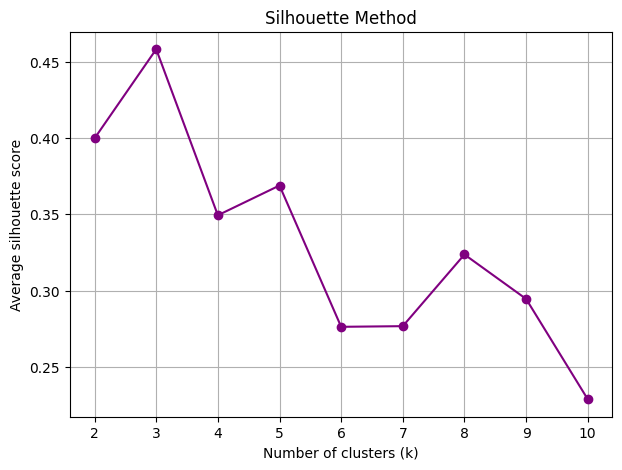

Best k according to silhouette: 3 (score=0.458)


In [17]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='purple')
plt.title("Silhouette Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average silhouette score")
plt.grid(True)
plt.savefig(f"{save_path}/Average silhouette score.png", dpi=300)
plt.show()

best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k according to silhouette: {best_k} (score={max(silhouette_scores):.3f})")

## Agglomerative Clustering

We apply agglomerative clustering using 3 clusters.

In [18]:
agg = AgglomerativeClustering(n_clusters=3)
clusters2 = agg.fit_predict(X_scaled)
data['Cluster_Agglo'] = clusters2

## DBSCAN

Density-based clustering method that can detect noise points.

In [19]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters3 = dbscan.fit_predict(X_scaled)
data['Cluster_DBSCAN'] = clusters3

## OPTICS Clustering
OPTICS is similar to DBSCAN but handles varying densities better.

In [20]:
opti = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clusters4 = opti.fit_predict(X_scaled)
data['Cluster_OPTICS'] = clusters4

## Clustering Performance Evaluation

We compare all clustering algorithms using:

- **Silhouette Score**
- **Davies-Bouldin Index**

In [21]:
print("\nSILHOUETTE SCORES")
print("K-Means:", silhouette_score(X_scaled, clusters))
print("Agglomerative:", silhouette_score(X_scaled, clusters2))
print("DBSCAN:", silhouette_score(X_scaled, clusters3))
print("OPTICS:", silhouette_score(X_scaled, clusters4))

print("\nDAVIES-BOULDIN INDEX")
print("K-Means:", davies_bouldin_score(X_scaled, clusters))
print("Agglomerative:", davies_bouldin_score(X_scaled, clusters2))
print("DBSCAN:", davies_bouldin_score(X_scaled, clusters3))
print("OPTICS:", davies_bouldin_score(X_scaled, clusters4))


SILHOUETTE SCORES
K-Means: 0.4582633767207058
Agglomerative: 0.2646091480214908
DBSCAN: 0.1958113956262888
OPTICS: 0.5691272972373264

DAVIES-BOULDIN INDEX
K-Means: 1.2490949174866433
Agglomerative: 1.2845213578374575
DBSCAN: 1.579362320957095
OPTICS: 1.6737737249458478


## PCA Visualization (2 Components)

We reduce the data to 2 dimensions using PCA for visualization.

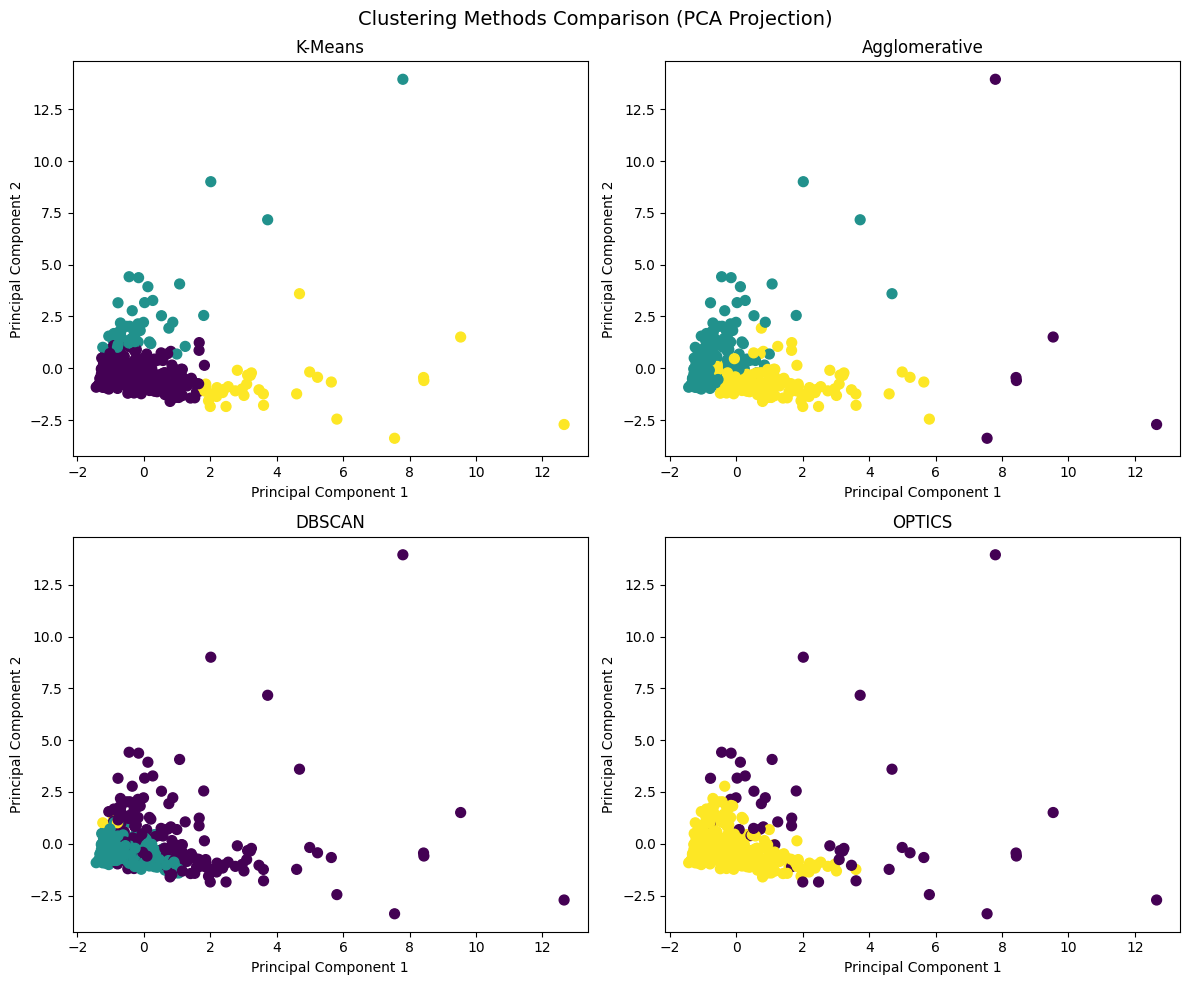

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

methods = {
    "K-Means": clusters,
    "Agglomerative": clusters2,
    "DBSCAN": clusters3,
    "OPTICS": clusters4
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, cls) in enumerate(methods.items()):
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=cls, cmap='viridis', s=50)
    axes[i].set_title(name)
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")

plt.suptitle("Clustering Methods Comparison (PCA Projection)", fontsize=14)
plt.tight_layout()
plt.savefig(f"{save_path}/(PCA Projection).png", dpi=300)

plt.show()

# Conclusion

This notebook explored several clustering techniques on the Wholesale Customers dataset.

### Key observations:

- **K-Means** performs well with k=3 and shows good Silhouette and Davies-Bouldin scores.
- **Agglomerative Clustering** produces similar results but may be more sensitive to scaling.
- **DBSCAN** can detect noise points, but performance heavily depends on `eps` and `min_samples`.
- **OPTICS** is more flexible than DBSCAN, especially with varying densities.
- PCA visualization reveals clear cluster separation for K-Means and Agglomerative methods.

Overall, **K-Means** and **Agglomerative** are the most stable for this dataset, while **DBSCAN** and **OPTICS** provide additional insights into density-based structures.